In [1]:
import pandas as pd
import sqlite3


In [2]:
import matplotlib.pyplot as plt

In [3]:
from IPython.display import clear_output
import numpy as np

In [4]:

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("./clientes.db")
df = pd.read_sql_query("SELECT * from player", con)

In [5]:
def map_float(x):
    return float(x)
df.head(100)
df["mlt"] = df["mlt"].map(map_float)

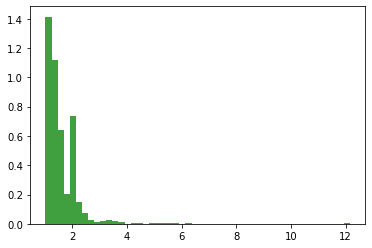

In [6]:
n, bins, patches = plt.hist(df[df["mlt"]  >0]["mlt"], 50, density=True, facecolor='g', alpha=0.75)

In [7]:

df_tempo = pd.read_sql_query("SELECT * from tempo", con)
df_tempo.head()

,id,tempo
0,1,2.99
1,2,20.39
2,3,1.83
3,4,2.5
4,5,1.47


In [8]:
df_tempo["tempo"] = df_tempo["tempo"].map(map_float)

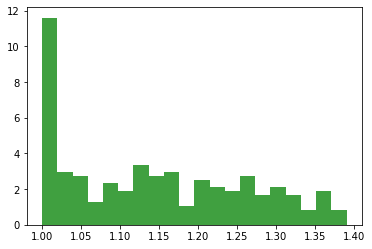

In [9]:
n, bins, patches = plt.hist(df_tempo[df_tempo["tempo"]<1.4]["tempo"], 20, density=True, facecolor='g', alpha=0.75)

In [10]:
len(df_tempo[df_tempo["tempo"] <= 1.5]["tempo"])/len(df_tempo[df_tempo["tempo"] >= 1.5]["tempo"])

0.7690217391304348

In [11]:
len(df_tempo[df_tempo["tempo"] <= 1.4]["tempo"])/len(df_tempo["tempo"])

0.38330757341576505

In [12]:
# 1- 1.4, 1.4-2.1, 2-1

In [13]:
df_tempo["tempo_atra"]  = df_tempo["tempo"].shift(-1)

In [14]:
df_tempo = df_tempo.dropna()
df_tempo
tm_df_tempo = len(df_tempo)

In [15]:
def map_categoria(x):
    r_casa = x >= 1 and x  < 1.4
    r_dinheiro = x >= 1.4 and x <2.3
    r_ganancia = x >= 2.3
    
    if r_casa:
        return "casa"
    elif r_dinheiro:
        return "ganhando"
    elif r_ganancia:
        return "ganancia"
    
    

In [16]:
df_tempo["tempo_c"] = df_tempo["tempo"].map(map_categoria)
df_tempo["tempo_atra_c"] = df_tempo["tempo_atra"].map(map_categoria)

In [17]:
def pega_sequencia(df_tempo, c_preview, c_seguinte):
    r_tempo_c = df_tempo["tempo_c"] == c_preview
    r_tempo_atra_c = df_tempo["tempo_atra_c"] == c_seguinte


    return len(df_tempo[r_tempo_c & r_tempo_atra_c])/len(df_tempo["tempo_c"]) *100
    

In [18]:
d_saida = {}
d_saida["g-ga"] = pega_sequencia(df_tempo,'ganancia','ganancia')
d_saida["g-c"] = pega_sequencia(df_tempo,'ganancia','casa')
d_saida["g-d"] = pega_sequencia(df_tempo,'ganancia','ganhando')

d_saida["c-c"] = pega_sequencia(df_tempo,'casa','casa')
d_saida["c-ga"] = pega_sequencia(df_tempo,'casa','ganancia')
d_saida["c-d"] = pega_sequencia(df_tempo,'casa','ganhando')


d_saida["d-d"] = pega_sequencia(df_tempo,'ganhando','ganhando')
d_saida["d-ga"] = pega_sequencia(df_tempo,'ganhando','ganancia')
d_saida["d-c"] = pega_sequencia(df_tempo,'ganhando','casa')


print(5*"***--")
print("***--GANANCIA")
print(f"ganancia --> ganancia {d_saida['g-ga']}%")
print(f"ganancia --> casa {d_saida['g-c']}%")
print(f"ganancia --> ganhando {d_saida['g-d']}%")
print(5*"***--")


print("***--CASA")
print(f"casa --> casa {d_saida['c-c']}%")
print(f"casa --> ganhando {d_saida['c-d']}%")
print(f"casa --> ganancia {d_saida['g-ga']}%")
print(5*"***--")

print("***--GANHANDO")
print(f"ganhando --> ganhando {d_saida['d-d']}%")
print(f"ganhando --> casa {d_saida['d-ga']}%")
print(f"ganhando --> ganancia {d_saida['d-c']}%")
print(5*"***--")


***--***--***--***--***--
***--GANANCIA
ganancia --> ganancia 14.705882352941178%
ganancia --> casa 13.46749226006192%
ganancia --> ganhando 10.061919504643962%
***--***--***--***--***--
***--CASA
casa --> casa 13.003095975232199%
casa --> ganhando 9.442724458204333%
casa --> ganancia 14.705882352941178%
***--***--***--***--***--
***--GANHANDO
ganhando --> ganhando 4.798761609907121%
ganhando --> casa 8.359133126934983%
ganhando --> ganancia 11.145510835913312%
***--***--***--***--***--


In [19]:
print(f"ganancia {(d_saida['g-ga']+ d_saida['g-d'])/(d_saida['g-ga']+ d_saida['g-c'] + d_saida['g-d'])}")
print(f'casa {(d_saida["c-ga"]+ d_saida["c-d"])/(d_saida["c-ga"]+ d_saida["c-c"] + d_saida["c-d"])}')
print(f'dinheiro {(d_saida["d-ga"]+ d_saida["d-d"])/(d_saida["d-ga"]+ d_saida["d-c"] + d_saida["d-d"])}')


ganancia 0.6477732793522267
casa 0.6528925619834711
dinheiro 0.5414012738853503


In [20]:
import time

In [21]:
def get_last_resultado():
    query ="""
    SELECT * 
        FROM    tempo
        WHERE   id = (SELECT MAX(id)  FROM tempo);
    """
    # con = sqlite3.connect("./clientes.db")
    cur = con.cursor()
    cur.execute(query)

    rows = cur.fetchall()
    return float(rows[0][1])

# for row in rows:
#     print(row)

In [22]:
montante_inicial = 200
qnt_aposta = 3
lis_montante = []

In [23]:
# antiga
# def estrategia(x):
#     categoria = map_categoria(x)
#     r_casa = categoria == "casa"
#     r_dinheiro = categoria == "ganhando"
#     r_ganancia = categoria == "ganancia"

#     if r_casa:
#         return 1.6 + np.random.uniform(-2,2)*0.1
#     if  r_ganancia:
#         return 1.6 + np.random.uniform(-2,2)*0.1
#     elif r_dinheiro:
#         return 0
#     else:
#         return 0

In [24]:
def estrategia(x):
    categoria = map_categoria(x)
    r_casa = categoria == "casa"
    r_dinheiro = categoria == "ganhando"
    r_ganancia = categoria == "ganancia"

    if r_casa:
        return 1.3 + np.random.uniform(0,3)*0.1
    if  r_ganancia:
        return 1.6 + np.random.uniform(0,4)*0.1
    elif r_dinheiro:
        return 0
    else:
        return 0

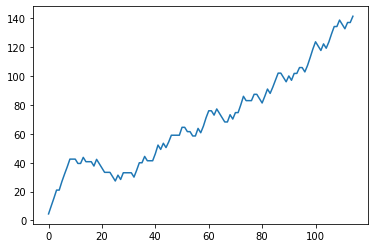

115 - apostou o valor de 1.6776590430968208, o tempo da ultima 3.65, tendo um montante de 341.4452697005949 


KeyboardInterrupt: 

In [25]:
last_aposta = get_last_resultado()
r_valor_while = True
for i in range(150):
    r_valor_while = True
    t_aposta = estrategia(last_aposta)
    print(f"{i} - apostou o valor de {t_aposta}, o tempo da ultima {last_aposta}, tendo um montante de {montante_inicial} ")
#     print(last_aposta)
    
   
    while(r_valor_while):
        time.sleep(0.3)
        
        novo_valor = get_last_resultado()
        r_novo_valor = novo_valor != last_aposta
#         print(r_novo_valor)
        if r_novo_valor:
            r_valor_while = False
            last_aposta = novo_valor

            if novo_valor > t_aposta:
                montante_inicial = montante_inicial + qnt_aposta * t_aposta
            else:
                montante_inicial = montante_inicial - qnt_aposta
            lis_montante.append(montante_inicial - 200)
            clear_output(wait=True)
            plt.plot(lis_montante)
            plt.show()
#             print(montante_inicial)

